## Saving a Cats v Dogs Model

This is a minimal example showing how to train a fastai model on Kaggle, and save it so you can use it in your app.

In [1]:
# Make sure we've got the latest version of fastai:
!pip install -Uqq fastai

First, import all the stuff we need from fastai:

In [2]:
from fastai.vision.all import *
from fastai.vision.widgets import *  #Needed for ImageClassiferCleaner

Download and decompress our dataset, which is pictures of dogs and cats:

In [3]:
path = untar_data(URLs.PETS)/'images'
print(path)

fns = get_image_files(path)
failed = verify_images(fns)
failed.map(Path.unlink)


/root/.fastai/data/oxford-iiit-pet/images


(#0) []

We need a way to label our images as dogs or cats. In this dataset, pictures of cats are given a filename that starts with a capital letter:

In [4]:
# The input to this function is a string - the name of the file.
def is_cat(x): 
    if (x[0].isupper()):
        return "Cat"
    else:
        return "Dog"

Now we can create our `DataLoaders`:

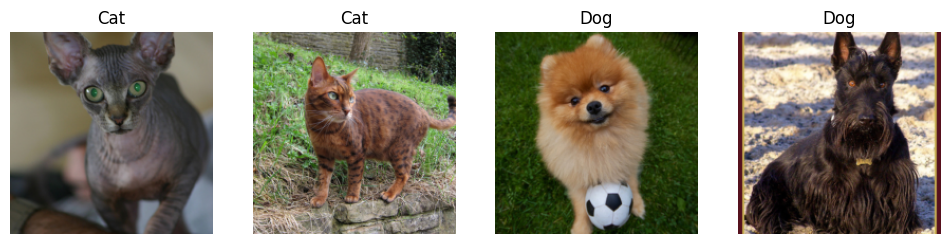

In [5]:
# Why is a string passed to is_cat function vs. a Path
dls = ImageDataLoaders.from_name_func('.',
    get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat,
    item_tfms=Resize(192))

dls.valid.show_batch(max_n=4, nrows=1)

... and train our model, a resnet18 (to keep it small and fast):

In [6]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 167MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.194061,0.060716,0.018945,00:19


epoch,train_loss,valid_loss,error_rate,time
0,0.072900,0.044078,0.014208,00:19
1,0.041649,0.028719,0.010149,00:19
2,0.026474,0.021885,0.007442,00:20


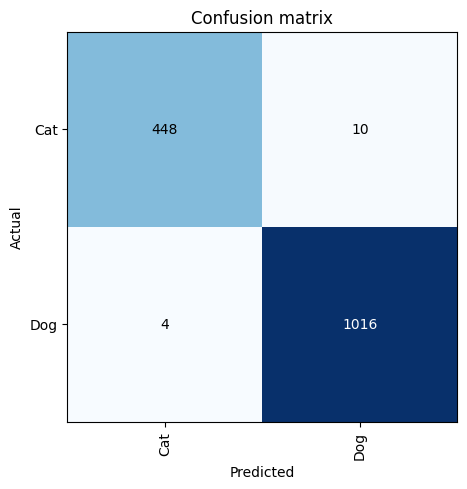

In [7]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()


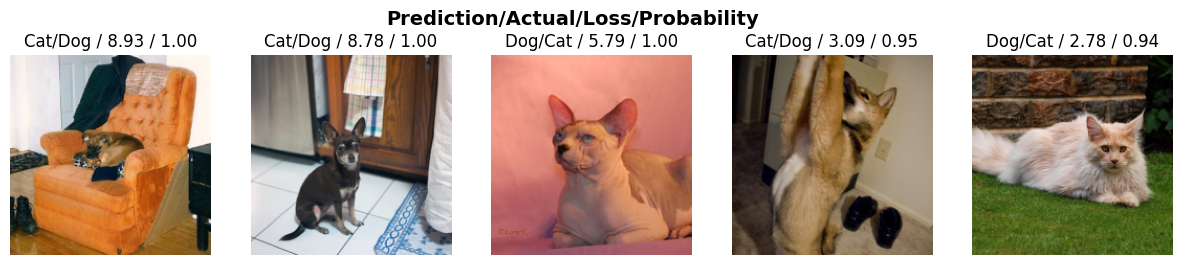

In [8]:
interp.plot_top_losses(5, nrows=1)

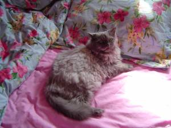

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner 

In [ ]:
for idx in cleaner.delete(): 
    cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): 
    shutil.move(str(cleaner.fns[idx]), path/cat)

Note:  I need to recrate the data loader. 

See - https://forums.fast.ai/t/how-to-retrain-the-bear-classifier-model-after-cleaning-the-data/86231

In [ ]:
dls = ImageDataLoaders.from_name_func('.',
    get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat,
    item_tfms=Resize(192))
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Now we can export our trained `Learner`. This contains all the information needed to run the model:

In [7]:
learn.export('model.pkl')

Finally, open the Kaggle sidebar on the right if it's not already, and find the section marked "Output". Open the `/kaggle/working` folder, and you'll see `model.pkl`. Click on it, then click on the menu on the right that appears, and choose "Download". After a few seconds, your model will be downloaded to your computer, where you can then create your app that uses the model.